In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43 
cur_path = os.getcwd() 
for i in range(classes): 
    path = os. path.join(cur_path,'train', str(i)) 
    images = os.listdir(path) 
    for a in images: 
        try: 
            image = Image.open(path + '/'+ a) 
            image = image.resize((30,30)) 
            image = np.array(image) 
            data.append(image) 
            labels.append(i) 
        except: 
            print("Error loading image") 
data = np.array(data)
labels = np.array(labels)
                           
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


Epoch 1/15
981/981 [==============================] - 54s 55ms/step - loss: 2.0370 - accuracy: 0.4841 - val_loss: 0.7071 - val_accuracy: 0.8411
Epoch 2/15
981/981 [==============================] - 53s 54ms/step - loss: 0.8675 - accuracy: 0.7421 - val_loss: 0.3161 - val_accuracy: 0.9075
Epoch 3/15
981/981 [==============================] - 53s 54ms/step - loss: 0.5542 - accuracy: 0.8313 - val_loss: 0.1808 - val_accuracy: 0.9504
Epoch 4/15
981/981 [==============================] - 54s 55ms/step - loss: 0.4124 - accuracy: 0.8785 - val_loss: 0.1562 - val_accuracy: 0.9578
Epoch 5/15
981/981 [==============================] - 55s 56ms/step - loss: 0.3391 - accuracy: 0.9016 - val_loss: 0.1148 - val_accuracy: 0.9723
Epoch 6/15
981/981 [==============================] - 56s 57ms/step - loss: 0.3097 - accuracy: 0.9112 - val_loss: 0.1052 - val_accuracy: 0.9765
Epoch 7/15
981/981 [==============================] - 54s 55ms/step - loss: 0.2933 - accuracy: 0.9157 - val_loss: 0.1381 - val_accuracy:

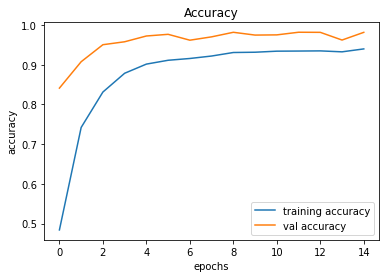

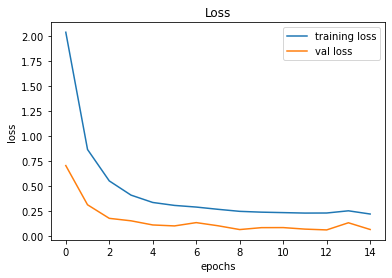

0.9298495645288994


In [7]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary()
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eps = 15
anc = model.fit(X_t1, y_t1, batch_size=32, epochs=eps, validation_data=(X_t2, y_t2))
model.save("my_model.h5")
#plotting graphs for accuracy
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
   image = Image.open(img)
   image = image.resize((30,30))
   data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)
classes = np.argmax(pred,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes))
model.save('traffic_classifier.h5')

In [1]:
#import libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
import cv2


#load the trained model to classify sign
from keras.models import load_model
model = load_model('traffic_classifier.h5')


#dictionary to label all traffic signs class.
classes = {1:'Speed limit (20km/h)',
           2:'Speed limit (30km/h)',
           3:'Speed limit (50km/h)',
           4:'Speed limit (60km/h)',
           5:'Speed limit (70km/h)',
           6:'Speed limit (80km/h)',
           7:'End of speed limit (80km/h)',
           8:'Speed limit (100km/h)',
           9:'Speed limit (120km/h)',
           10:'No passing',
           11:'No passing veh over 3.5 tons',
           12:'Right-of-way at intersection',
           13:'Priority road',
           14:'Yield',
           15:'Stop',
           16:'No vehicles',
           17:'Veh > 3.5 tons prohibited',
           18:'No entry',
           19:'General caution',
           20:'Dangerous curve left',
           21:'Dangerous curve right',
           22:'Double curve',
           23:'Bumpy road',
           24:'Slippery road',
           25:'Road narrows on the right',
           26:'Road work',
           27:'Traffic signals',
           28:'Pedestrians',
           29:'Children crossing',
           30:'Bicycles crossing',
           31:'Beware of ice/snow',
           32:'Wild animals crossing',
           33:'End speed + passing limits',
           34:'Turn right ahead',
           35:'Turn left ahead',
           36:'Ahead only',
           37:'Go straight or right',
           38:'Go straight or left',
           39:'Keep right',
           40:'Keep left',
           41:'Roundabout mandatory',
           42:'End of no passing',
           43:'End no passing vehicle with a weight greater than 3.5 tons'}


#initialise GUI
top=tk.Tk()
top.geometry('800x600')

#Define the PhotoImage Constructor by passing the image file
img= PhotoImage(file='bg.png', master= top)
img_label= Label(top,image=img)

#define the position of the image
img_label.place(x=0, y=0)

top.title('Traffic Sign Classification')
top.configure(background='#000000')
label=Label(top,background='indian red', font=('arial',15,'bold'))
label1=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)


#define functions
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])[0]
    classes_x = numpy.argmax(pred,axis=0)
    sign = classes[classes_x+1]
    #print("Sign indicates : ")
    print(sign)
    label1.configure(foreground='#011638', text="Sign Indicates : ")
    label.configure(foreground='#011638', text=sign)
    
    
def show_classify_button(file_path):
    classify_b=Button(top,text="Recognize Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
    
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
def close_win():
   top.destroy()
    
    
#Create Buttons 
close=Button(top,text= "Close",command=close_win,padx=10,pady=5)
close.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
close.pack(side=BOTTOM,pady=20)


upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=30)


#Image View Section
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,pady=20,expand=True)
label1.pack(side=BOTTOM,pady=20,expand=True)


#heading label
heading = Label(top,text="Check Traffic Sign!",padx = 20,pady=20, font=('arial',30,'bold'))
heading.configure(background='bisque2',foreground='#364156')
heading.pack(side=TOP,pady=20)


top.mainloop()